# PROYECTO FINAL - MODELOS Y SIMULACIÓN DE SISTEMAS 2
# ANURAN CALLS . CLASIFICACIÓN DE CANTOS DE ANUROS (RANAS Y SAPOS)

Integrantes del equipo: 
Juan David Cano Gómez
Julián Andrés Castaño Jiménez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. FASE INICIAL**

*   1.1 Lectura e interpretación temprana de datos: Esto corresponde a un primer acercamiento a los datos de manera gráfica con el fin de empezar a adoptar estrategias que nos lleven a una correcta clasificación y procesamiento de los datos.




In [2]:
# Descargamos el archivo .zip desde el repositorio UCI
! wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran%20Calls%20(MFCCs).zip"

#instalamos libreria para descomprimir
!pip install unrar

#descomprimimos el archivo zip de interés
!unzip /content/Anur*.zip

#Cargamos y leemos los datos desde el archivo con extensión .csv
datos = pd.read_csv("/content/Frogs_MFCCs.csv")
df = pd.DataFrame(datos)
print ("LOS DATOS HAN SIDO CARGADOS CORRECTAMENTE")

--2022-09-14 01:43:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran%20Calls%20(MFCCs).zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1300058 (1.2M) [application/x-httpd-php]
Saving to: ‘Anuran Calls (MFCCs).zip’

Anuran Calls (MFCCs 100%[===================>]   1.24M  1.59MB/s    in 0.8s    

2022-09-14 01:43:35 (1.59 MB/s) - ‘Anuran Calls (MFCCs).zip’ saved [1300058/1300058]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Archive:  /content/Anuran Calls (MFCCs).zip
  inflating: Frogs_MFCCs.csv         
  inflating: Readme.txt              
LOS DATOS HAN SIDO CARGADOS CORRECTAMENTE


Debido a que la última columna de los datos corresponde al identificador del audio grabado de los cantos de anuros, esta columna no es necesaria para el problema que se está resolviendo, no es una columna útil y se elimina.

In [3]:
df = df.drop(["RecordID"],axis=1)
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [4]:
df.iloc[:,9]

0       0.124676
1       0.170883
2       0.232538
3       0.270375
4       0.266434
          ...   
7190    0.081075
7191    0.089034
7192    0.081317
7193    0.089316
7194    0.076180
Name: MFCCs_10, Length: 7195, dtype: float64

**DESCRIPCIÓN DE LOS DATOS CONTENIDOS EN EL ARCHIVO CSV**

In [5]:
x = df.iloc[:,0:22].values  # conjunto de datos 
y1 = df.iloc[:,22].values   # variable de salida 1 (familia)
y2 = df.iloc[:,23].values   # variable de salida 2 (genero)
y3 = df.iloc[:,24].values   # varaible de salida 3 (especie)

In [6]:
muestras = np.shape(x)[0]
print ("El numero de muestras es:", muestras)
caracteristicas = np.shape(x)[1]
print ("El numero de caracteristicas o variables es:", caracteristicas)

El numero de muestras es: 7195
El numero de caracteristicas o variables es: 22


In [7]:
clases_familia = np.unique(y1)
clases_familia

array(['Bufonidae', 'Dendrobatidae', 'Hylidae', 'Leptodactylidae'],
      dtype=object)

In [8]:
clases_genero = np.unique(y2)
clases_genero

array(['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas',
       'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax'],
      dtype=object)

In [9]:
clases_especie = np.unique(y3)
clases_especie

array(['AdenomeraAndre', 'AdenomeraHylaedactylus', 'Ameeregatrivittata',
       'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae',
       'LeptodactylusFuscus', 'OsteocephalusOophagus',
       'Rhinellagranulosa', 'ScinaxRuber'], dtype=object)

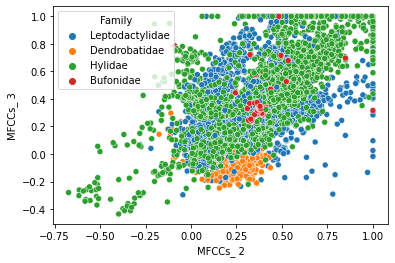

In [10]:
sns.scatterplot(data=df, x="MFCCs_ 2", y="MFCCs_ 3", hue="Family")

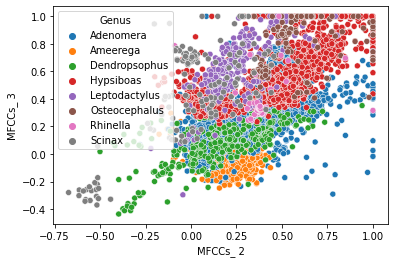

In [11]:
sns.scatterplot(data=df, x="MFCCs_ 2", y="MFCCs_ 3", hue="Genus")

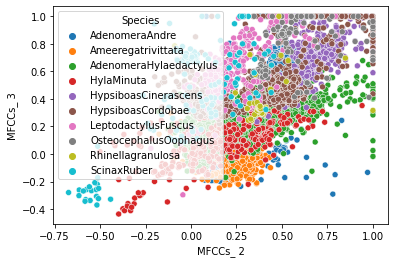

In [12]:
sns.scatterplot(data=df, x="MFCCs_ 2", y="MFCCs_ 3", hue="Species")

Para saber cómo está distribuidas las muestras por clases, se debe encontrar el número de muestras por cada clase. 

In [13]:
def numero_muestras_por_clase(Y):
  diccionario = {}
  clases = np.unique(Y)
  for j in range(len(clases)):
    diccionario[clases[j]] = 0
  for i in range(len(Y)):
    for j in range(len(clases)):
      if Y[i] == clases[j]:
        diccionario[clases[j]] = diccionario[clases[j]] + 1

  return (diccionario)

In [14]:
numero_muestras_por_clase(y1)

{'Bufonidae': 68,
 'Dendrobatidae': 542,
 'Hylidae': 2165,
 'Leptodactylidae': 4420}

In [15]:
numero_muestras_por_clase(y2)

{'Adenomera': 4150,
 'Ameerega': 542,
 'Dendropsophus': 310,
 'Hypsiboas': 1593,
 'Leptodactylus': 270,
 'Osteocephalus': 114,
 'Rhinella': 68,
 'Scinax': 148}

In [16]:
numero_muestras_por_clase(y3)

{'AdenomeraAndre': 672,
 'AdenomeraHylaedactylus': 3478,
 'Ameeregatrivittata': 542,
 'HylaMinuta': 310,
 'HypsiboasCinerascens': 472,
 'HypsiboasCordobae': 1121,
 'LeptodactylusFuscus': 270,
 'OsteocephalusOophagus': 114,
 'Rhinellagranulosa': 68,
 'ScinaxRuber': 148}

Como se observó con los resultados anteriores, se evidencia que se trata de un problema desbalanceado en donde por cada salida, cada clase tiene diferente número de muestras. Se trata de un problema que hay que resolver para lograr mejores resultados y predicciones correctas. En los siguientes gráficos de barras también se muestra el desbalance del problema.

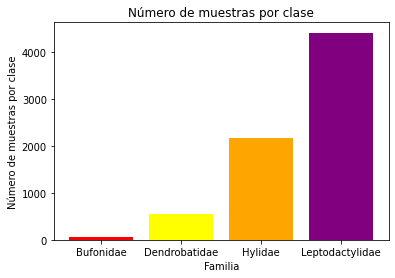

In [17]:
fig, ax = plt.subplots()
colores = ["red","yellow","orange","purple"]
ax.bar(numero_muestras_por_clase(y1).keys(), numero_muestras_por_clase(y1).values(), color = colores)
ax.set_title("Número de muestras por clase")
ax.set_xlabel("Familia")
ax.set_ylabel("Número de muestras por clase")
ax.set_xticks(list(numero_muestras_por_clase(y1).keys()))
plt.show()

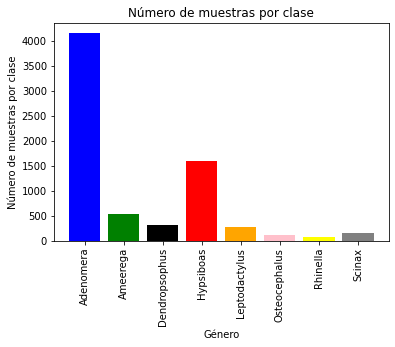

In [18]:
fig, ax = plt.subplots()
colores = ["blue","green","black","red","orange","pink","yellow","grey"]
ax.bar(numero_muestras_por_clase(y2).keys(), numero_muestras_por_clase(y2).values(), color = colores)
ax.set_title("Número de muestras por clase")
ax.set_xlabel("Género")
ax.set_ylabel("Número de muestras por clase")
ax.set_xticks(list(numero_muestras_por_clase(y2).keys()))
plt.xticks(rotation = 90)
plt.show()

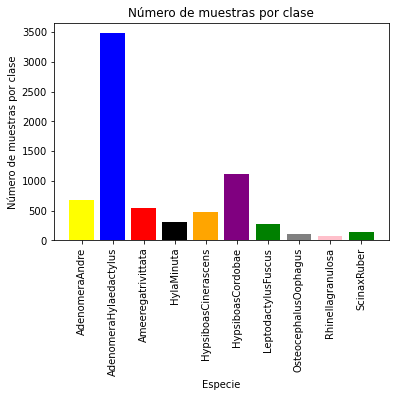

In [19]:
fig, ax = plt.subplots()
colores = ["yellow","blue","red","black","orange","purple","green","grey","pink","green"]
ax.bar(numero_muestras_por_clase(y3).keys(), numero_muestras_por_clase(y3).values(), color = colores)
ax.set_title("Número de muestras por clase")
ax.set_xlabel("Especie")
ax.set_ylabel("Número de muestras por clase")
ax.set_xticks(list(numero_muestras_por_clase(y3).keys()))
plt.xticks(rotation = 90)
plt.show()

Debido a que las variables de salida son variables categóricas, es necesario codificarlas para que los modelos se puedan ajustar y puedan predecir correctamente. Para ello se utiliza la técnica Label Encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df = df.drop(['Family','Genus'], axis=1)
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,9
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,9
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,9
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,9


De esta manera, las clases de anuros según su familia, género y especie quedan codificadas así:
* Familia
0.   Bufonidae
1.   Dendrobatidae
2.   Hylidae
3.   Leptodactylidae
* Género
0.   Adenomera
1.   Ameerega
2.   Dendropsophus
3.   Hypsiboas
4.   Leptodactylus
5.   Osteocephalus
6.   Rhinella
7.   Scinax
* Especie
0.   AdenomeraAndre
1.   AdenomeraHylaedactylus
2.   Ameeregatrivittata
3.   HylaMinuta
4.   HypsiboasCinerascens
5.   HypsiboasCordobae
6.   LeptodactylusFuscus
7.   OsteocephalusOophagus
8.   Rhinellagranulosa
9.   ScinaxRuber







# ¿CÓMO INTERPRETAR LAS 22 COLUMNAS DE LOS COEFICIENTES MFCC?

Cada nueva muestra pertenece a un especimen, contiene 22 coeficientes, cada muestra representa un audio completo que es el canto emitido por un anuro y está seccionado en 22 partes que pueden caracterizarse según la literatura. 

De una manera muy similar a lo que sucede con las cadenas de ADN, las proteinas logran clasificarse una vez se cumplen cierto patrón que ha sido registrado, así nuestra misión consiste en identificar esos patrones en los coeficientes MFCC que nos conduciran a la identificación correcta de los anuros.





# JUSTIFICACIÓN DE LA SELECCIÓN DE VARIABLE DE SALIDA

Basado en los datos que se pueden apreciar en la "Lectura e interpretación de datos" de la FASE INICIAL, entendemos que podríamos manejar multiples salidas como lo son **género**, **familia** y **especie**. Sin embargo, referidos a la literatura de este tipo de problemas, en el campo de la Bioliogía existen clasificaciones taxonomicas que nos permiten establecer una alta dependencia entre ellas, por lo que a través de la clasificación que se encuentra en el nivel más bajo de jerarquía podremos obtener de manera indirecta las otras dos clasificaciones que están en los dos niveles superiores de jerarquía, así pues, definimos a **ESPECIE** como la única salida que tendremos en cuenta. Orden de jerarquía de lo general a lo partícular: Género, familia, especie.



Como ya se mencionó antes, este problema es un problema desbalanceado que se debe balancear con el fin de que las muestras de las clases mayoritarias no opaquen a las muestras de las clases minoritarias, o lo que es lo mismo, que las clases minoritarias no se vean mal representadas y que los modelos de clasificación no se sesguen a la clase mayoritaria. 

Se utilizará la técnica de submuestreo inteligente que basa su funcionamiento en eliminar muestras de la clase mayoritaria, utilizando la librería de Sklearn llamada *Imbalanced Learn*, el método llamado *EditedNearestNeighbours*. 

La librería es https://imbalanced-learn.org/stable/index.html.

El método disponible en https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html#imblearn.under_sampling.EditedNearestNeighbours.fit_resample.

In [21]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import StratifiedKFold
from collections import Counter

x, y = df.iloc[:,0:22].to_numpy(), df.iloc[:,22].to_numpy()                                       # se utiliza la salida especies
skf = StratifiedKFold()
for train_index, test_index in skf.split(x,y):
  xtrain, xtest = x[train_index], x[test_index]
  ytrain, ytest = y[train_index], y[test_index]
                                       
Counter_org = Counter(y)
print ("La cantidad de muestras y caracteristicas del dataset original es:" +str(x.shape))
print ("La distribución por clases del conjunto original es:" +str(Counter_org))
enn = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=1000)                     # definir el método de submuestreo
x_res, y_res = enn.fit_resample(xtrain,ytrain)                                                    # entrenar y remuestrear
Counter = Counter(y_res)
print ("La distribución por clases de conjunto de datos redistribuida es:" +str(Counter))
print("La cantidad de muestras y caracteristicas del nuevo dataset es:" +str(x_res.shape))
    
print(x_res)
print(y_res)

La cantidad de muestras y caracteristicas del dataset original es:(7195, 22)
La distribución por clases del conjunto original es:Counter({1: 3478, 5: 1121, 0: 672, 2: 542, 4: 472, 3: 310, 6: 270, 9: 148, 7: 114, 8: 68})
La distribución por clases de conjunto de datos redistribuida es:Counter({1: 1108, 5: 896, 0: 538, 2: 434, 4: 378, 3: 248, 6: 216, 9: 118, 7: 92, 8: 54})
La cantidad de muestras y caracteristicas del nuevo dataset es:(4082, 22)
[[ 1.          0.1529363  -0.1055859  ...  0.05768398  0.11868014
   0.01403845]
 [ 1.          0.17153426 -0.09897474 ...  0.02013996  0.08226299
   0.02905574]
 [ 1.          0.15231709 -0.08297267 ... -0.02508323  0.0991084
   0.07716238]
 ...
 [ 1.          0.28319668  0.80002953 ...  0.11671266  0.0565064
  -0.00642102]
 [ 1.          0.4424084   0.64592315 ...  0.02696022  0.05432441
   0.0250529 ]
 [ 1.          0.35718794  0.44396733 ...  0.01149511 -0.02393924
   0.12667364]]
[0 0 0 ... 9 9 9]


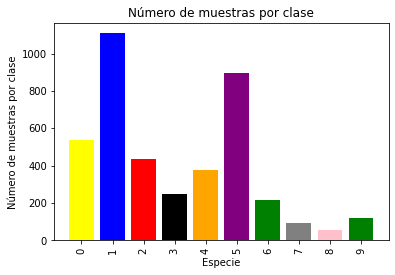

In [22]:
def numero_muestras_por_clase(y_res):
  diccionario = {}
  clases = np.unique(y_res)
  for j in range(len(clases)):
    diccionario[clases[j]] = 0
  for i in range(len(y_res)):
    for j in range(len(clases)):
      if y_res[i] == clases[j]:
        diccionario[clases[j]] = diccionario[clases[j]] + 1

  return (diccionario)

fig, ax = plt.subplots()
colores = ["yellow","blue","red","black","orange","purple","green","grey","pink","green"]
ax.bar(numero_muestras_por_clase(y_res).keys(), numero_muestras_por_clase(y_res).values(), color = colores)
ax.set_title("Número de muestras por clase")
ax.set_xlabel("Especie")
ax.set_ylabel("Número de muestras por clase")
ax.set_xticks(list(numero_muestras_por_clase(y_res).keys()))
plt.xticks(rotation = 90)
plt.show()

In [23]:
X, Y = x_res, y_res

**Metodología de validación:** Por ser un problema desbalanceado, la metodología de validación debe ser la más apropiada para este tipo de porblemas. Por ello utulizará la metodología de validación cruzada estratificada (*Stratified K-Fold*). En esta metodología las particiones preservan los porcentajes de muestras de cada clase. 

**Medida de desempeño principal o global:** Por tratarse de un problema desbalanceado en donde hay más cantidad de muestras de una clase que de la otra, se hace uso de *Mattews Correlation Coefficient (Coefieciente de Correlación de Mattews)*. Esta métrica es muy útil cuando las clases tienen diferentes dimensiones.

**Otras medidas de desempeño para evaluar el sistema:** Medidas como *Roc_Auc_Score*, *Accuracy*, *F1 Score*. 

**SIMULACIÓN**

En la siguiente parte se implementan cinco algoritmos de clasificación (Análisis de Discriminante Cuadrático, Ventana de Parzen (Método Kernel), Gradient Boosting Tree, Redes Neuronales Artificiales, Máquinas de Soporte Vectorial.

**1. Análisis de Discriminante Cuadrático**

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import StratifiedKFold

In [25]:
def analisis_discriminante_cuadratico(X,Y):
  
  # metodología de validación StratifiedKFold (problema desbalanceado)
  skf = StratifiedKFold(n_splits=4)
  for train_index, test_index in skf.split(X,Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # normalización de datos 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    resultados = pd.DataFrame()
    idx = 0
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    qda.fit(X_train, Y_train)
    y_train_pred = qda.predict(X_train)
    y_test_pred = qda.predict(X_test)
    matrices_cov = qda.covariance_
    medias = qda.means_
    scores = qda.predict_proba(X_test)
    Error_train = matthews_corrcoef(Y_train, y_train_pred)
    Error_test = matthews_corrcoef(Y_test, y_test_pred)
    Int_conf = np.std(Error_test)
    Accuracy = accuracy_score(Y_test, y_test_pred)
    rocaucscore = roc_auc_score(Y_test, scores, average='macro', multi_class='ovo')
    F1_score = f1_score(Y_test, y_test_pred, average='micro')

    resultados.iloc[idx,'Error entrenamiento'] = Error_train
    resultados.iloc[idx,'Error prueba'] = Error_test
    resultados.iloc[idx,'Accuracy'] = Accuracy
    resultados.iloc[idx,'Roc Score'] = rocaucscore
    resultados.iloc[idx,'F1_score'] = F1_score
    idx+=1

  return (resultados)

In [27]:
analisis_discriminante_cuadratico(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


IndexError: ignored

**2. Ventana de Parzen (Método Kernel)**



In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
def Ventana_Parzen(hs,X,Y):
  
  sfk = StratifiedKFold(n_splits=3)
  resultados = pd.DataFrame()
  idx = 0

  for h in hs:
    # metodología de validación
    errores = []
    accuracy = []
    ras = []
    f1score = []
    for train_index, test_index in skf.split(X,Y):
      xtrain, xtest = X[train_index], X[test_index]
      ytrain, ytest = Y[train_index], Y[test_index]

    # estandarización de los datos
      scaler = StandardScaler()
      xtrain = scaler.fit_transform(xtrain)
      xtest = scaler.transform(xtest)

      kd = KernelDensity(bandwidth=h, kernel='gaussian', metric='euclidean')
      kd.fit(xtrain)
      yest = kd.score_samples(xtest)
      error_test = matthews_corrcoef(ytest, yest)
      errores.append(error_test)
      Accuracy = accuracy_score(ytest, yest)
      accuracy.append(Accuracy)
      RAS = roc_auc_score(y_true=ytest, average='micro', multi_class='ovo')
      ras.append(RAS)
      f1Score = f1_score(ytest, yest, average='micro')
      f1score.append(f1Score)

      resultados.iloc[idx, 'Ventana de Parzen'] = h
      resultados.iloc[idx, 'Error de prueba'] = errores
      resultados.iloc[idx, 'Error prueba(desviación estándar)'] = np.std(errores)
      resultados.iloc[idx, 'Accuracy'] = accuracy
      resultados.iloc[idx, 'Roc Auc Score'] = ras
      resultados.iloc[idx, 'F1 score'] = f1score
      idx+=1

  return(resultados)

In [ ]:
Ventana_Parzen([0.1,0.2,0.3],X,Y)